In [111]:
import cv2
import os
import glob

img_dir = "./label" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = sorted(glob.glob(data_path))
labels = []
for f1 in files:
#     print(f1)
    img = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    _, img = cv2.threshold(img,20,255,cv2.THRESH_BINARY)
    labels.append(img)
    
img_dir = "./predict" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = sorted(glob.glob(data_path))
predicts = []
for f1 in files:
#     print(f1)
    img = cv2.imread(f1, cv2.IMREAD_GRAYSCALE)
    _, img = cv2.threshold(img,85,255,cv2.THRESH_BINARY)
    predicts.append(img)

In [140]:
import numpy as np

scores = []
for i in range(30):
    target = labels[i]
    prediction = predicts[i]
    
    #IoU
    intersection = np.logical_and(target, prediction)
    union = np.logical_or(target, prediction)
    iou_score = np.sum(intersection) / np.sum(union)
    
    scores.append(iou_score)
    print(i, iou_score)

0 0.8492795131119664
1 0.8746816097809476
2 0.8775860328993844
3 0.8382378854625551
4 0.8493403181994568
5 0.7763371150729336
6 0.7609626759127065
7 0.9086380298900273
8 0.8046700773973501
9 0.9525251223911363
10 0.6814332247557003
11 0.2413808523006752
12 0.2244984259737819
13 0.8836500117288295
14 0.9531569027799591
15 0.7640979147778785
16 0.7735849056603774
17 0.7279168095074848
18 0.8073421014597485
19 0.8419994639506835
20 0.815885698808234
21 0.7996264674493063
22 0.6743111415368818
23 0.8003548034934498
24 0.8025164113785558
25 0.5957354221061792
26 0.6988448844884488
27 0.8268947213211442
28 0.7454698693636747
29 0.7386929566012806


In [141]:
np.mean(scores)

0.7629883789853579

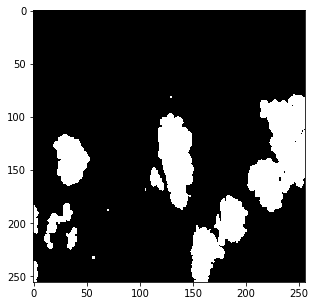

In [142]:
# threshold,threshold_image = cv2.threshold(img,70,255,cv2.THRESH_BINARY_INV) 
import matplotlib.pyplot as plt

array = cv2.cvtColor(labels[11], cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(array, cmap=pyplot.cm.binary, vmin=0, vmax=1)
plt.show()

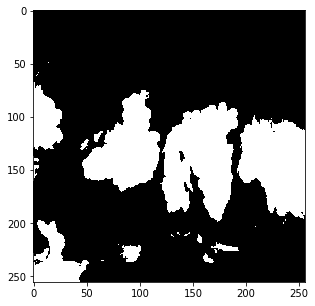

In [144]:
array = cv2.cvtColor(predicts[11], cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=(10, 5))
ax.imshow(array, cmap=pyplot.cm.binary, vmin=0, vmax=1)
plt.show()